In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io
from skimage.filters import unsharp_mask
from skimage.util import img_as_float

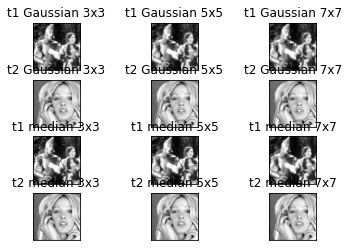

True

In [5]:
img1 = cv2.imread("Resource/test1.pgm", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Resource/test2.tif", cv2.IMREAD_GRAYSCALE)

# 高斯滤波
img1Gaussian3 = cv2.GaussianBlur(img1, ksize=(3, 3), sigmaX=1.5)
img1Gaussian5 = cv2.GaussianBlur(img1, ksize=(5, 5), sigmaX=1.5)
img1Gaussian7 = cv2.GaussianBlur(img1, ksize=(7, 7), sigmaX=1.5)

img2Gaussian3 = cv2.GaussianBlur(img2, ksize=(3, 3), sigmaX=1.5)
img2Gaussian5 = cv2.GaussianBlur(img2, ksize=(5, 5), sigmaX=1.5)
img2Gaussian7 = cv2.GaussianBlur(img2, ksize=(7, 7), sigmaX=1.5)

# 中值滤波
img1Median3 = cv2.medianBlur(img1, ksize=3)
img1Median5 = cv2.medianBlur(img1, ksize=5)
img1Median7 = cv2.medianBlur(img1, ksize=7)

img2Median3 = cv2.medianBlur(img2, ksize=3)
img2Median5 = cv2.medianBlur(img2, ksize=5)
img2Median7 = cv2.medianBlur(img2, ksize=7)

titles = ['t1 Gaussian 3x3', 't1 Gaussian 5x5', 't1 Gaussian 7x7',
          't2 Gaussian 3x3', 't2 Gaussian 5x5', 't2 Gaussian 7x7',
          't1 median 3x3', 't1 median 5x5', 't1 median 7x7',
          't2 median 3x3', 't2 median 5x5', 't2 median 7x7']
images = [img1Gaussian3, img1Gaussian5, img1Gaussian7,
          img2Gaussian3, img2Gaussian5, img2Gaussian7,
          img1Median3, img1Median5, img1Median7,
          img2Median3, img2Median5, img2Median7]

# 请使用Python console（将代码粘贴至Python控制台中）
# 而非jupyter notebook来执行图形显示代码
# 因为jupyter输出过小，会导致图片显示有误
for i in range(12):
    plt.subplot(4, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("Output/img1Gaussian3.jpg", img1Gaussian3)
cv2.imwrite("Output/img1Gaussian5.jpg", img1Gaussian5)
cv2.imwrite("Output/img1Gaussian7.jpg", img1Gaussian7)
cv2.imwrite("Output/img2Gaussian3.jpg", img2Gaussian3)
cv2.imwrite("Output/img2Gaussian5.jpg", img2Gaussian5)
cv2.imwrite("Output/img2Gaussian7.jpg", img2Gaussian7)
cv2.imwrite("Output/img1Median3.jpg", img1Median3)
cv2.imwrite("Output/img1Median5.jpg", img1Median5)
cv2.imwrite("Output/img1Median7.jpg", img1Median7)
cv2.imwrite("Output/img2Median3.jpg", img2Median3)
cv2.imwrite("Output/img2Median5.jpg", img2Median5)
cv2.imwrite("Output/img2Median7.jpg", img2Median7)

In [6]:
# 得到高斯核：方法一
sigma = 1.5
size = 3
kernel = np.fromfunction(lambda x, y: (1 / (2 * math.pi * (sigma ** 2))) * math.e ** ((-1 *((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2)) / (2 * (sigma ** 2))), (size, size))
kernel /= np.sum(kernel)  # 归一化
kernel

array([[0.09474166, 0.11831801, 0.09474166],
       [0.11831801, 0.14776132, 0.11831801],
       [0.09474166, 0.11831801, 0.09474166]])

In [8]:
# 得到高斯核：方法二
kernel2 = cv2.getGaussianKernel(ksize=size, sigma=sigma)
kernel2 * kernel2.T

array([[0.09474166, 0.11831801, 0.09474166],
       [0.11831801, 0.14776132, 0.11831801],
       [0.09474166, 0.11831801, 0.09474166]])

In [9]:
# 得到高斯核：方法三
def myGaussianKernel(size, sigma):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    my_kernel = np.outer(gauss, gauss)
    return my_kernel / np.sum(my_kernel)

myGaussianKernel(size, sigma)

array([[0.09474166, 0.11831801, 0.09474166],
       [0.11831801, 0.14776132, 0.11831801],
       [0.09474166, 0.11831801, 0.09474166]])

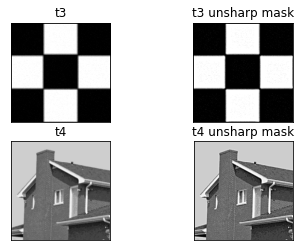

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [18]:
img3 = cv2.imread("Resource/test3_corrupt.pgm", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("Resource/test4.tif", cv2.IMREAD_GRAYSCALE)

img31 = img_as_float(img3)
img41 = img_as_float(img4)

# unsharp masking
img3Unsharped = unsharp_mask(img31, radius=3, amount=1.0)
img4Unsharped = unsharp_mask(img41, radius=3, amount=1.0)

titles = ['t3', 't3 unsharp mask', 't4', 't4 unsharp mask']
images = [img3, img3Unsharped, img4, img4Unsharped]

# 请使用Python console（将代码粘贴至Python控制台中）
# 而非jupyter notebook来执行图形显示代码
# 因为jupyter输出过小，会导致图片显示有误
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

io.imsave("Output/img3Unsharped.jpg", img3Unsharped)
io.imsave("Output/img4Unsharped.jpg", img4Unsharped)

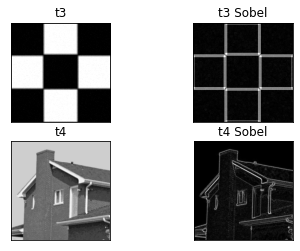

True

In [12]:
img3SobelX = cv2.convertScaleAbs(cv2.Sobel(img3, ddepth=cv2.CV_64F, dx=1, dy=0))
img3SobelY = cv2.convertScaleAbs(cv2.Sobel(img3, ddepth=cv2.CV_64F, dx=0, dy=1))
# img3SobelCombined = cv2.bitwise_or(img3SobelX, img3SobelY)
img3SobelCombined = cv2.addWeighted(img3SobelX, 0.5, img3SobelY, 0.5, gamma=0)

img4SobelX = cv2.convertScaleAbs(cv2.Sobel(img4, ddepth=cv2.CV_64F, dx=1, dy=0))
img4SobelY = cv2.convertScaleAbs(cv2.Sobel(img4, ddepth=cv2.CV_64F, dx=0, dy=1))
# img4SobelCombined = cv2.bitwise_or(img4SobelX, img4SobelY)
img4SobelCombined = cv2.addWeighted(img4SobelX, 0.5, img4SobelY, 0.5, gamma=0)


titles = ['t3', 't3 Sobel', 't4', 't4 Sobel']
images = [img3, img3SobelCombined, img4, img4SobelCombined]

# 请使用Python console（将代码粘贴至Python控制台中）
# 而非jupyter notebook来执行图形显示代码
# 因为jupyter输出过小，会导致图片显示有误
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("Output/img3Sobel.jpg", img3SobelCombined)
cv2.imwrite("Output/img4Sobel.jpg", img4SobelCombined)

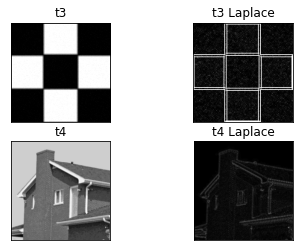

True

In [50]:
# 拉普拉斯边缘提取
img3Laplace = cv2.convertScaleAbs(cv2.Laplacian(img3, ddepth=cv2.CV_64F, ksize=3))
img4Laplace = cv2.convertScaleAbs(cv2.Laplacian(img4, ddepth=cv2.CV_64F, ksize=3))

titles = ['t3', 't3 Laplace', 't4', 't4 Laplace']
images = [img3, img3Laplace, img4, img4Laplace]

# 请使用Python console（将代码粘贴至Python控制台中）
# 而非jupyter notebook来执行图形显示代码
# 因为jupyter输出过小，会导致图片显示有误
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("Output/img3Laplace.jpg", img3Laplace)
cv2.imwrite("Output/img4Laplace.jpg", img4Laplace)

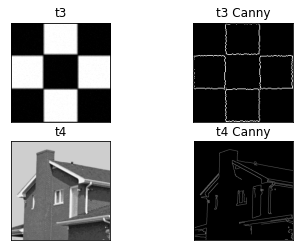

True

In [19]:
# Canny边缘提取
img3Canny = cv2.Canny(img3, threshold1=100, threshold2=200)
img4Canny = cv2.Canny(img4, threshold1=100, threshold2=200)

titles = ['t3', 't3 Canny', 't4', 't4 Canny']
images = [img3, img3Canny, img4, img4Canny]

# 请使用Python console（将代码粘贴至Python控制台中）
# 而非jupyter notebook来执行图形显示代码
# 因为jupyter输出过小，会导致图片显示有误
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

cv2.imwrite("Output/img3Canny.jpg", img3Canny)
cv2.imwrite("Output/img4Canny.jpg", img4Canny)